<a href="https://colab.research.google.com/github/kalebmes/ML-and-DL-projects/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


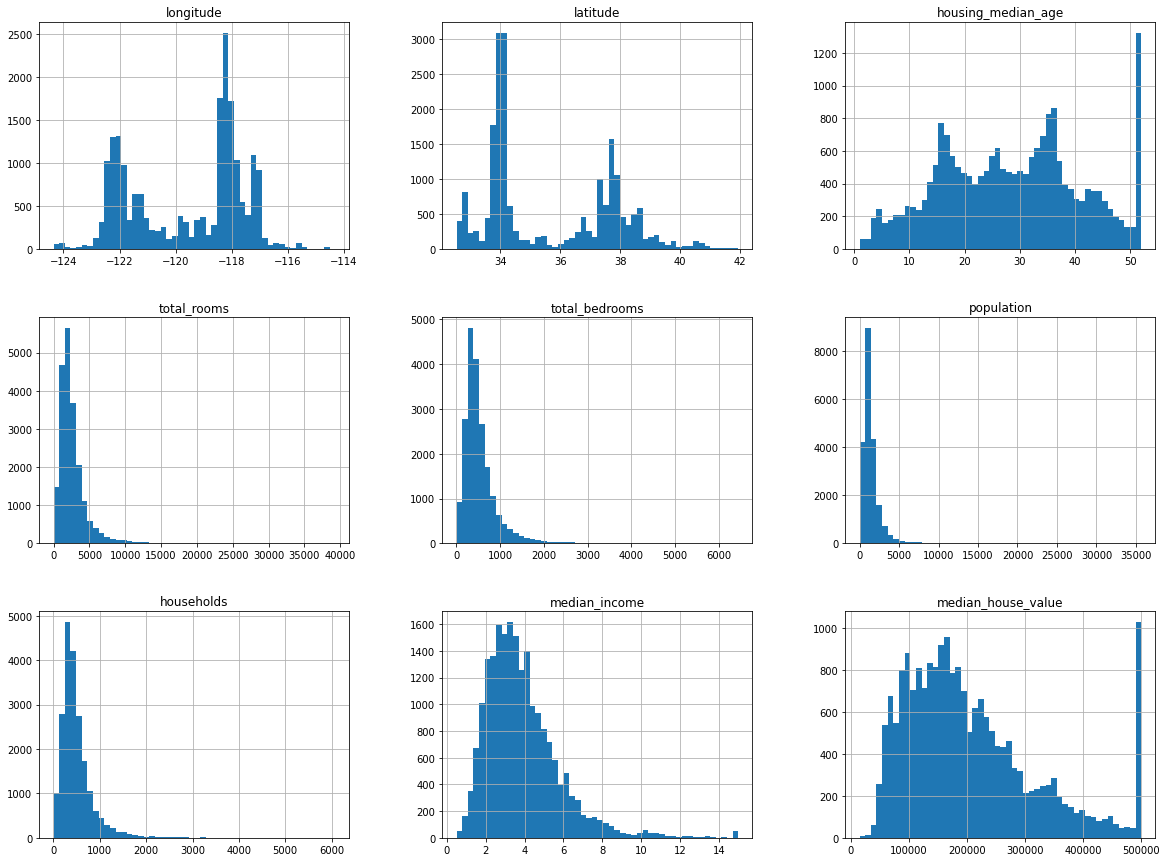

In [ ]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
def split_train_set(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

In [ ]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

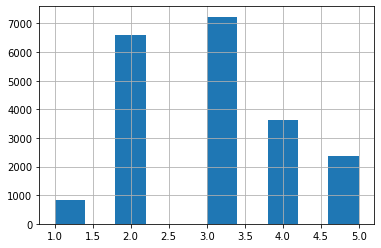

In [ ]:
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [ ]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace = True)

In [ ]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

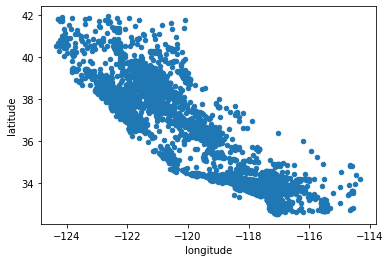

In [ ]:
housing.plot(kind='scatter', x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

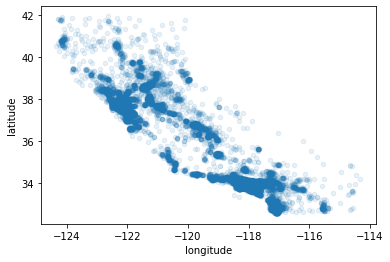

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

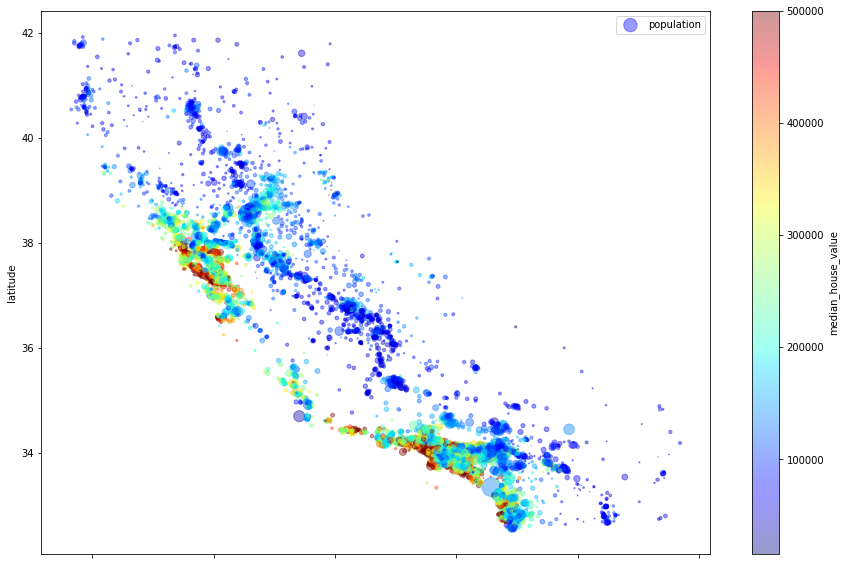

In [ ]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = housing["population"]/100, label = "population", figsize = (15, 10), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

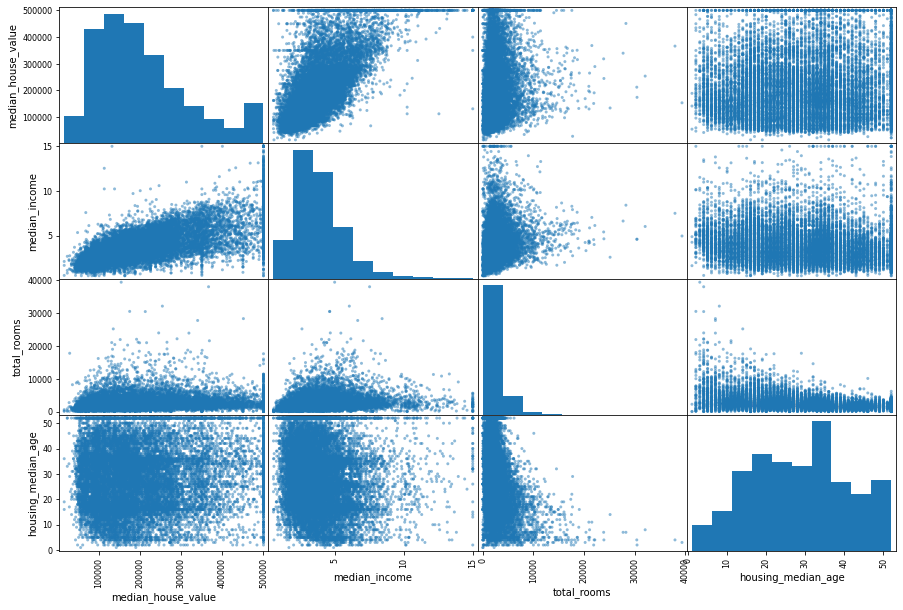

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(15, 10))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

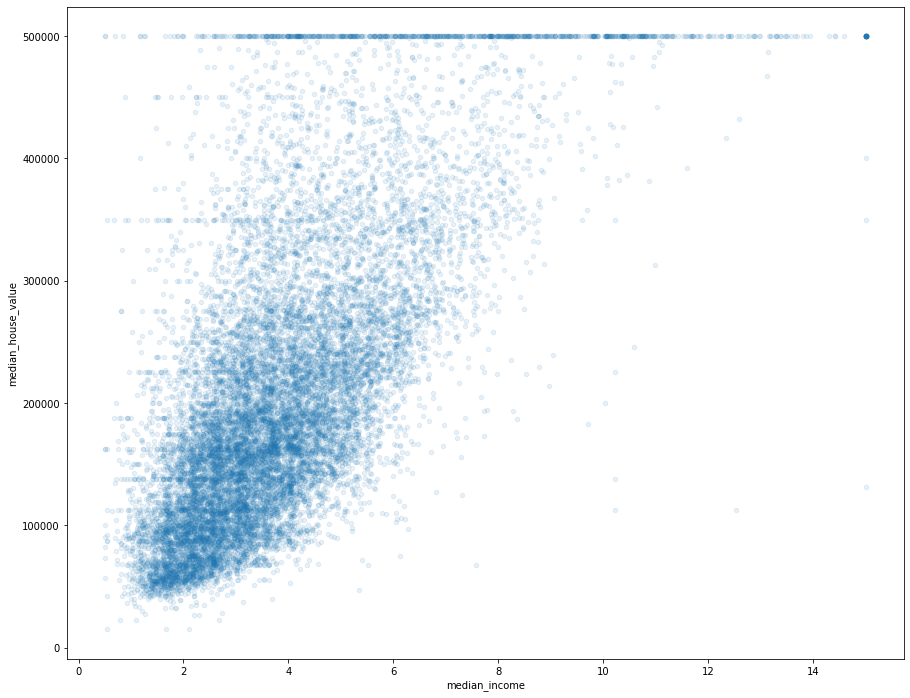

In [ ]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1, figsize = (15, 12))

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]


In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [ ]:
#dealing with missing values
#let's try filling it by computing the median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
#we also could have used imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
#since the imputer only calculates the median for non-categorical features, first we have to get rid of categorical features
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [ ]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [ ]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
#let's try using one_hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_onehot = cat_encoder.fit_transform(housing_cat)
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_onehot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [ ]:
#Feature scaling using scikit-learn
#we can use minmax scaler for normalization and standardization

In [ ]:
#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipleline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler())])
housing_num_tr = num_pipleline.fit_transform(housing_num)

In [ ]:
#let's handle all the numerical and categorical columns together
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipleline = ColumnTransformer([("num", num_pipleline, num_attribs), ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipleline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipleline.transform(some_data)
print("Predict: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predict:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
score = r2_score(housing_labels, lin_reg.predict(housing_prepared))
print(score)

0.6481553634454353


In [ ]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
r2_score(housing_labels, housing_predictions) * 100 #ohh 100% accuracy

100.0

In [ ]:
#so the model has overfit our data. Now let's try separating our data into cross validation 
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
display_scores(tree_rmse_scores)


Scores:  [71530.76738954 69884.38567764 68867.3544835  72080.51852942
 69355.26246635 78465.58839553 69343.9519462  73109.61312711
 68750.58887326 71708.02361263]
Mean:  71309.60545011886
Standard Deviation:  2783.4822324551797


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180675


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

In [ ]:
forest_reg_mse = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_mse)

Scores:  [51296.20208985 49020.65280346 46620.4484499  52089.73553405
 47653.59420717 52090.6673161  52632.97449491 50135.42902788
 48768.40992209 53764.47873821]
Mean:  50407.259258362545
Standard Deviation:  2220.012229922488


In [ ]:
#fine tune your model
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_regressor = RandomForestRegressor()
grid_search = GridSearchCV(forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63859.139524190134 {'max_features': 2, 'n_estimators': 3}
55232.80065131301 {'max_features': 2, 'n_estimators': 10}
52538.661372583025 {'max_features': 2, 'n_estimators': 30}
60320.97517801508 {'max_features': 4, 'n_estimators': 3}
52855.86483208937 {'max_features': 4, 'n_estimators': 10}
50406.456778886044 {'max_features': 4, 'n_estimators': 30}
58955.40691890572 {'max_features': 6, 'n_estimators': 3}
52875.13679685877 {'max_features': 6, 'n_estimators': 10}
49930.30449069626 {'max_features': 6, 'n_estimators': 30}
58921.78703440916 {'max_features': 8, 'n_estimators': 3}
52000.91818068534 {'max_features': 8, 'n_estimators': 10}
50025.130930422914 {'max_features': 8, 'n_estimators': 30}
63408.09253507044 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54286.27056540837 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59251.15058045061 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52473.41662679759 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.95513180e-02, 7.73704960e-02, 4.16771675e-02, 1.70887132e-02,
       1.63849205e-02, 1.71251399e-02, 1.60770888e-02, 3.19069077e-01,
       7.16985660e-02, 1.03502987e-01, 6.98985497e-02, 1.98744404e-02,
       1.33881416e-01, 2.07733661e-05, 2.40060154e-03, 4.37874526e-03])

In [ ]:
extra_attribs = ['rooms_per_hhold', "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipleline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.31906907687980357, 'median_income'),
 (0.13388141584687255, 'INLAND'),
 (0.10350298725405628, 'pop_per_hhold'),
 (0.08955131797674908, 'longitude'),
 (0.07737049597527271, 'latitude'),
 (0.07169856595748347, 'rooms_per_hhold'),
 (0.0698985496508127, 'bedrooms_per_room'),
 (0.041677167510184895, 'housing_median_age'),
 (0.019874440393840464, '<1H OCEAN'),
 (0.01712513990058833, 'population'),
 (0.01708871320803436, 'total_rooms'),
 (0.016384920519994975, 'total_bedrooms'),
 (0.01607708876158708, 'households'),
 (0.0043787452576748665, 'NEAR OCEAN'),
 (0.0024006015409863794, 'NEAR BAY'),
 (2.077336605845379e-05, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipleline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)

print(r2_score(y_test, final_predictions))
print(final_rmse)

0.8299519577745847
47077.18839138138


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([45133.64374518, 48943.61588561])

In [ ]:
#solutions to exercises
#1. training a svm on this dataset
from sklearn.svm import SVR
svm_reg1 = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0)
svm_reg1.fit(housing_prepared, housing_labels)

s1_predictions = svm_reg1.predict(X_test_prepared)
s1_reg_scores = cross_val_score(svm_reg1, housing_prepared, housing_labels, cv = 10, scoring = 'neg_mean_squared_error')
display_scores(s1_reg_scores)

Scores:  [-1.36256916e+10 -1.44273714e+10 -1.29789155e+10 -1.44959478e+10
 -1.31532225e+10 -1.50763152e+10 -1.43649318e+10 -1.39902320e+10
 -1.44554516e+10 -1.41229904e+10]
Mean:  -14069106983.304867
Standard Deviation:  616027029.4098963


In [ ]:
print(r2_score(housing_labels, svm_reg1.predict(housing_prepared)))
#hmm...let's see if this model performs better than at least the linear regression model

-0.05042042886435194


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
param_dist = [{'kernel': ['rbf'], 'C': [10, 30]}, 
              {'kernel': ['linear'], 'C': [1, 3]}]
grid_svm = GridSearchCV(svm_reg1, param_dist, scoring = 'neg_mean_squared_error', verbose=2, cv = 5)
grid_svm.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................C=10, kernel=rbf; total time=  56.5s
[CV] END ...................................C=10, kernel=rbf; total time=  50.5s
[CV] END ...................................C=10, kernel=rbf; total time=  45.1s
[CV] END ...................................C=10, kernel=rbf; total time= 1.7min
[CV] END ...................................C=10, kernel=rbf; total time=  57.6s
[CV] END ...................................C=30, kernel=rbf; total time=  48.1s
[CV] END ...................................C=30, kernel=rbf; total time= 1.4min
[CV] END ...................................C=30, kernel=rbf; total time= 2.2min
[CV] END ...................................C=30, kernel=rbf; total time=  24.7s
[CV] END ...................................C=30, kernel=rbf; total time=  27.1s
[CV] END .................................C=1, kernel=linear; total time=  14.3s
[CV] END .................................C=1, ke

GridSearchCV(cv=5, estimator=SVR(coef0=0),
             param_grid=[{'C': [10, 30], 'kernel': ['rbf']},
                         {'C': [1, 3], 'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
negative_mse = grid_svm.best_score_
best_rmse = np.sqrt(-negative_mse)
grid_best = grid_svm.best_estimator_
grid_best, best_rmse
#now let's try the randomized search

(SVR(C=3, coef0=0, kernel='linear'), 102376.3300964536)

In [ ]:
from scipy.stats import expon, reciprocal
param_distribution = [{'kernel': ['linear', 'rbf'], 'C': reciprocal(20, 200), 'gamma': expon(scale = 1.0)}]
rnd_search = RandomizedSearchCV(svm_reg1, param_distributions=param_distribution, scoring = 'neg_mean_squared_error', cv = 2, random_state = 42, verbose = 2)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear; total time=   8.4s
[CV] END C=47.37727900728156, gamma=3.010121430917521, kernel=linear; total time=   6.8s
[CV] END C=120.42620370295205, gamma=0.9084469696321253, kernel=rbf; total time=  22.9s
[CV] END C=120.42620370295205, gamma=0.9084469696321253, kernel=rbf; total time=  21.2s
[CV] END C=28.64339657822303, gamma=0.059838768608680676, kernel=rbf; total time=  22.4s
[CV] END C=28.64339657822303, gamma=0.059838768608680676, kernel=rbf; total time=  17.9s
[CV] END C=43.125943223708546, gamma=0.15416196746656105, kernel=linear; total time=   5.4s
[CV] END C=43.125943223708546, gamma=0.15416196746656105, kernel=linear; total time=   5.5s
[CV] END C=20.970775450389233, gamma=3.503557475158312, kernel=rbf; total time=  19.1s
[CV] END C=20.970775450389233, gamma=3.503557475158312, kernel=rbf; total time=  17.7s
[CV] END C=173.61318509025222, gamma=0.0007790692

RandomizedSearchCV(cv=2, estimator=SVR(coef0=0),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F59C64FFA0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F5B4057070>,
                                         'kernel': ['linear', 'rbf']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
negative_best_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_best_mse)
rmse

75523.42753054317

In [ ]:
rnd_search.best_estimator_

SVR(C=47.37727900728156, coef0=0, gamma=3.010121430917521, kernel='linear')

In [ ]:
r2_score(y_test, rnd_search.best_estimator_.predict(X_test_prepared)) * 100
#this parameter combination has a closer accuracy compared to the random forest regressor model
#however the best model remains the best randomforestregressor model rather than the SVM

61.29348783487505